In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Button(description='Upload and Classify', style=ButtonStyle())

Saving 1.jpg to 1.jpg
Saving 10_0.jpg to 10_0.jpg
Saving 10_2.jpg to 10_2.jpg
Saving 11_0.jpg to 11_0 (1).jpg
Saving 11_2.jpg to 11_2.jpg
Saving 15_0.jpg to 15_0.jpg
Saving 0056.jpg to 0056.jpg
Saving 64e3cd642024e6f0eb1a6853_gr1 (1).jpg to 64e3cd642024e6f0eb1a6853_gr1 (1).jpg
Saving 109_0.jpg to 109_0.jpg
Saving 110_1.jpg to 110_1.jpg
Saving 642x361_Burns_Types_Treatments_Second_Degree_Dark_Skin.webp to 642x361_Burns_Types_Treatments_Second_Degree_Dark_Skin.webp
Saving 63879de3378925040a731b99_thord-degree-burn.webp to 63879de3378925040a731b99_thord-degree-burn.webp
Saving abrasions (10).jpg to abrasions (10) (1).jpg
Saving abrasions (15).jpg to abrasions (15).jpg
Saving abrasions (19).jpg to abrasions (19) (1).jpg
Saving abrasions (34).jpg to abrasions (34) (1).jpg
Saving bruises (100).jpg to bruises (100).jpg
Saving bruises (103).jpg to bruises (103) (1).jpg
Saving bruises (104).jpg to bruises (104) (1).jpg
Saving burns (11).jpg to burns (11).jpg
Saving burns (23).jpg to burns (23).

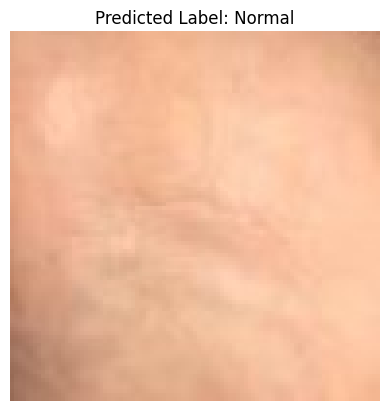

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


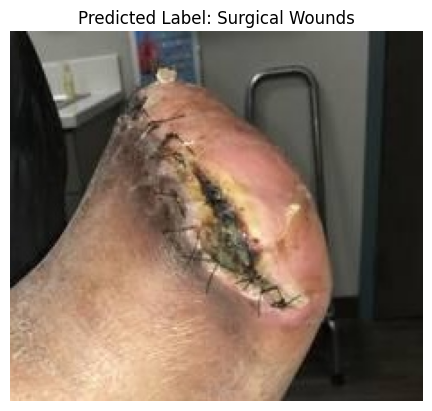

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


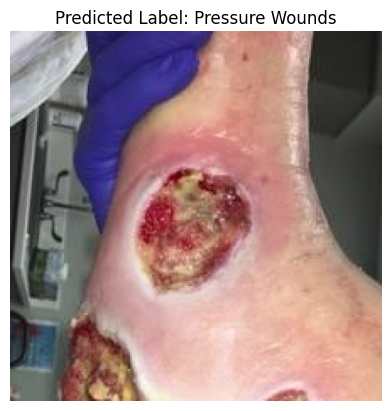

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


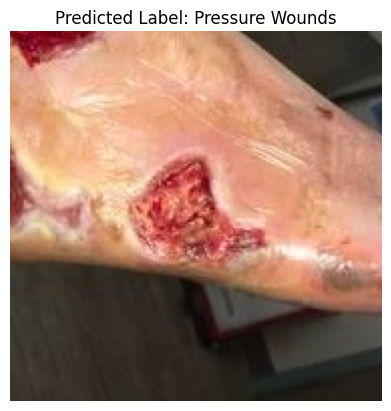

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


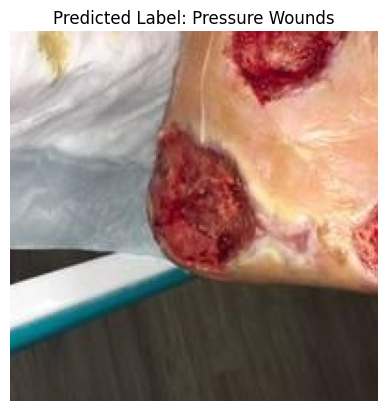

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


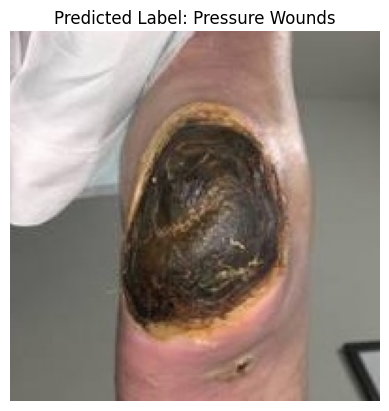

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


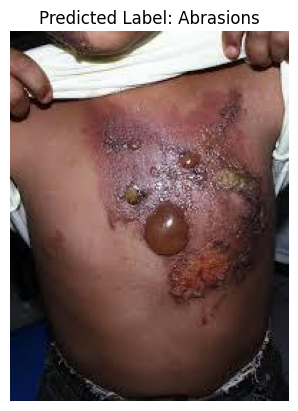

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


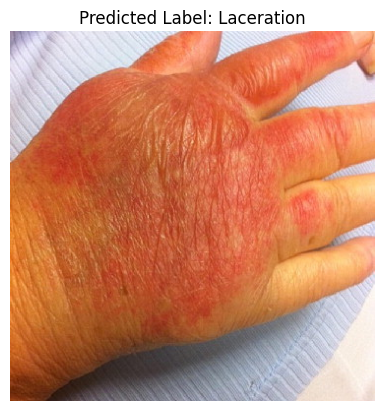

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


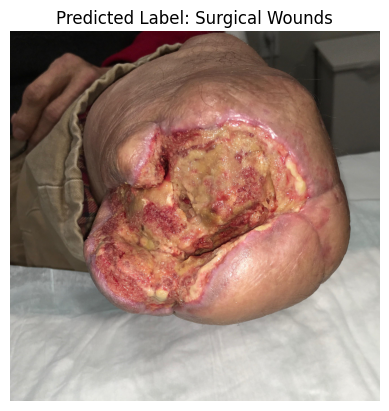

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


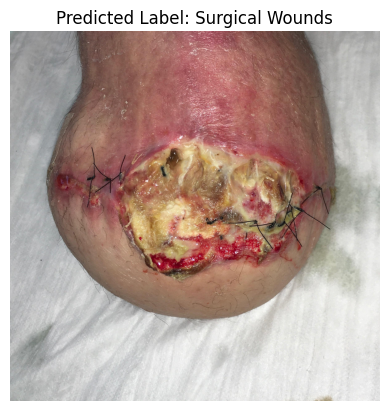

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


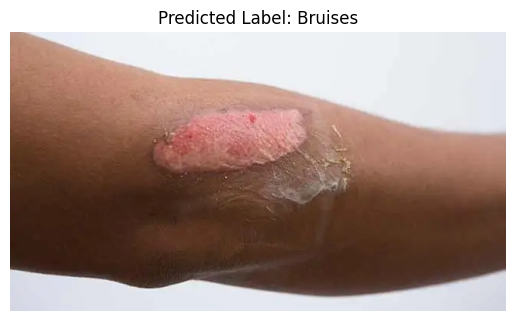

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


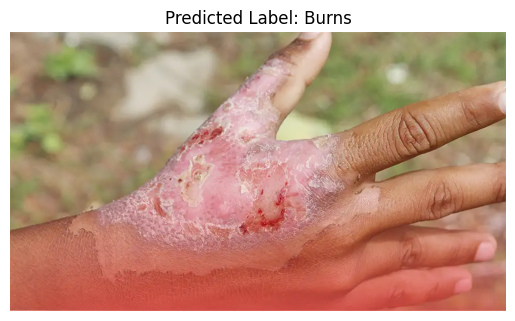

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


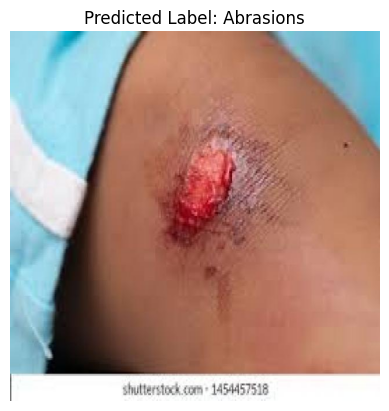

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


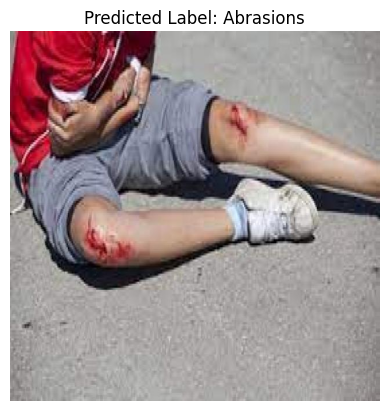

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


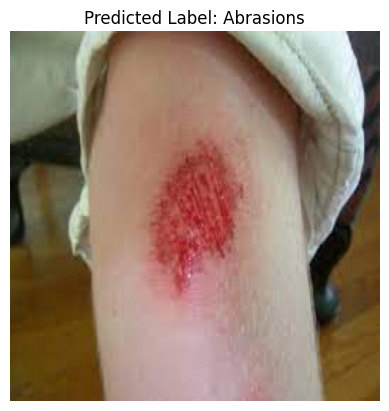

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


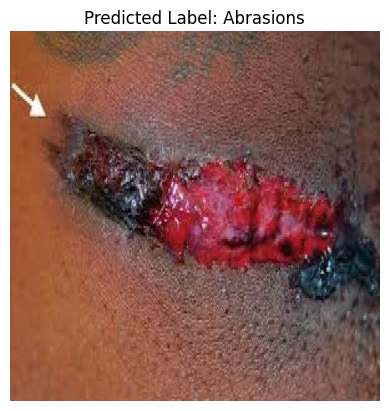

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


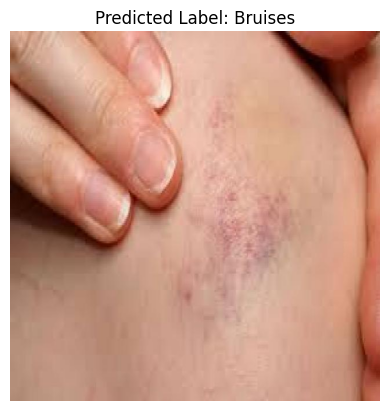

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


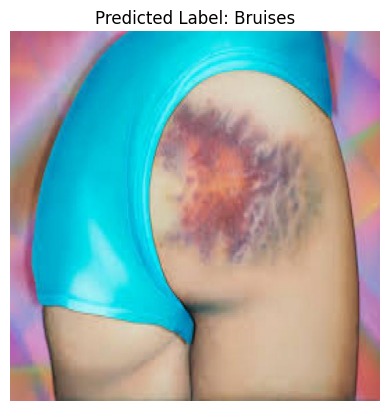

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


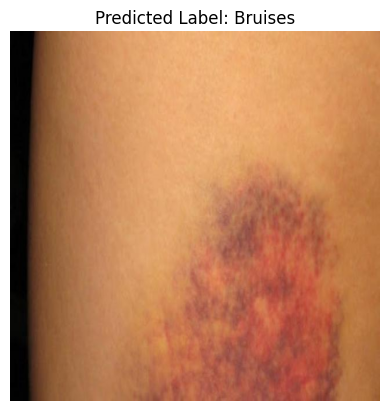

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


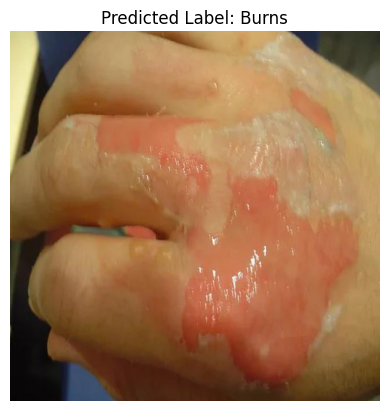

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


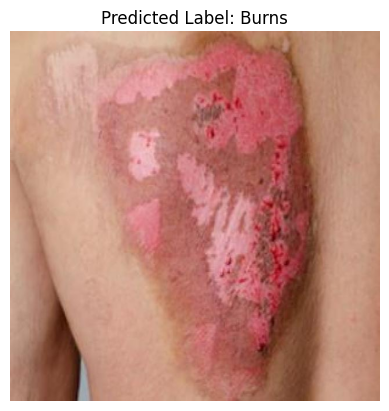

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


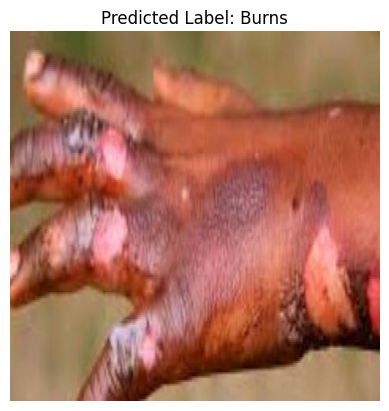

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


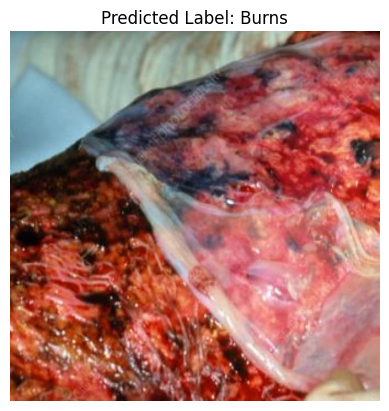

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


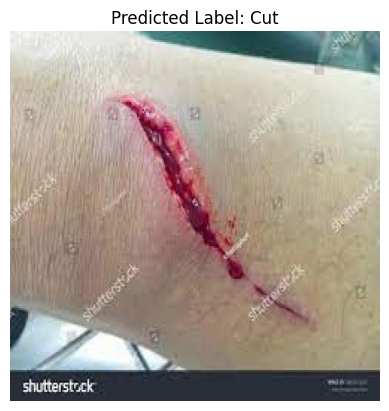

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


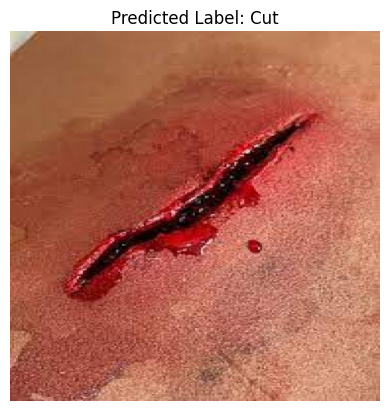

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


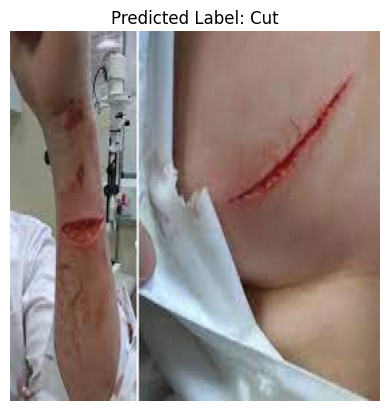

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


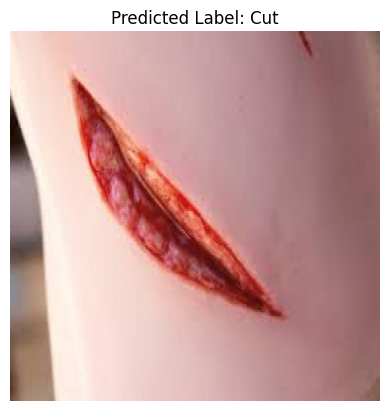

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


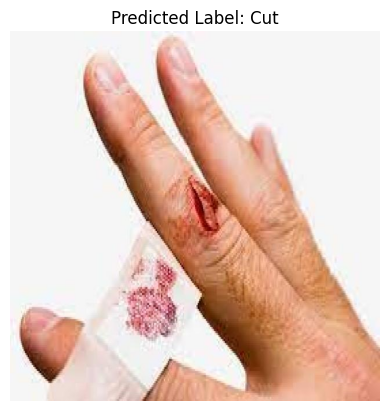

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


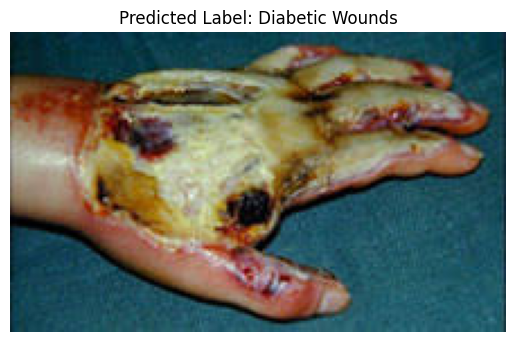

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


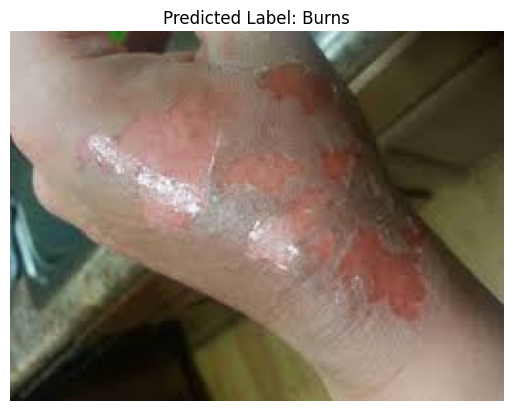

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


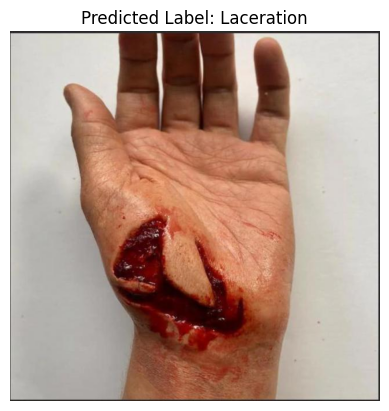

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


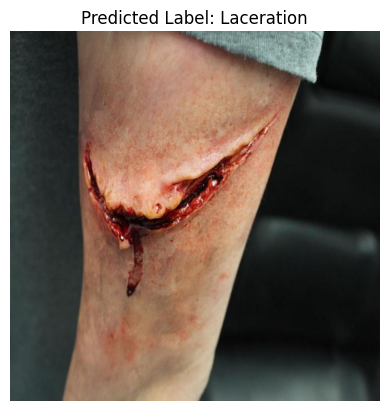

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


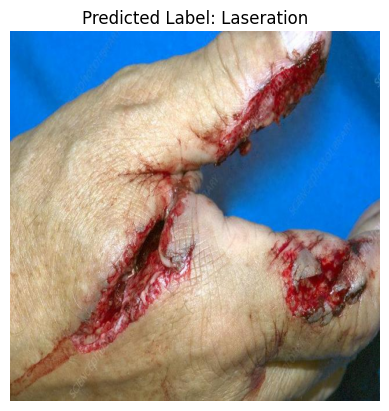

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


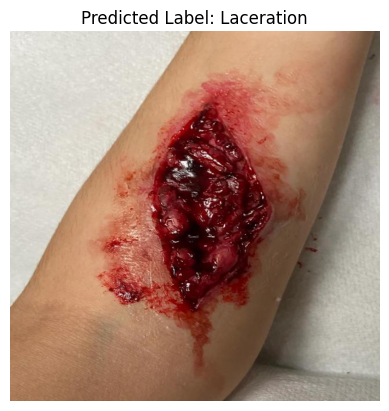

In [13]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from google.colab import files
from IPython.display import display
import ipywidgets as widgets
from sklearn.preprocessing import LabelEncoder

# Define the class names (replace with your actual class names)
class_names = [
    'Abrasions', 'Bruises', 'Burns', 'Cut', 'Diabetic Wounds',
    'Ingrown_nails', 'Laceration', 'Laseration', 'Normal',
    'Pressure Wounds', 'Stab_wound', 'Surgical Wounds', 'Venous Wounds'
]

# Create and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(class_names)  # Fit the LabelEncoder on the class names

# Load the saved model
model_path = '/content/drive/MyDrive/Collected and Categorized Wound Images (2).h5'
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img):
    """
    Preprocesses an image for prediction with ResNet50.
    - Converts BGR to RGB.
    - Resizes the image to (224, 224).
    - Normalizes the image using ResNet50's preprocess_input.
    """
    if img.shape[2] == 3:  # Ensure the image has 3 channels (RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 for ResNet50
    img = img.astype('float32')  # Convert to float32
    img = preprocess_input(img)  # Apply ResNet50 preprocessing
    return img

# Function to classify the uploaded image
def classify_image(btn):
    """
    Handles image upload, preprocessing, prediction, and display.
    """
    uploaded = files.upload()  # Upload the image
    for filename in uploaded.keys():
        # Read the uploaded image
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

        # Preprocess the image
        img_processed = preprocess_image(img)
        img_processed = np.expand_dims(img_processed, axis=0)  # Add batch dimension

        # Make a prediction
        predictions = model.predict(img_processed)
        predicted_class_index = np.argmax(predictions)  # Get the index of the predicted class
        predicted_label = label_encoder.classes_[predicted_class_index]  # Convert index to label

        # Display the image and prediction
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
        plt.axis('off')  # Hide axis
        plt.title(f'Predicted Label: {predicted_label}')  # Display only the predicted label
        plt.show()

# Create a button for uploading and classifying images
upload_button = widgets.Button(description="Upload and Classify")
upload_button.on_click(classify_image)  # Bind the button to the classify_image function
display(upload_button)  # Display the button